In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import os
print(os.getcwd())

D:\docs_mariana\ProjetosGit\averiguacao_cadastral\Analises_Mariana\Analises_modelo


In [3]:
# Load the datasets
import pandas as pd

# Usando o caminho absoluto
df_balanceado = pd.read_csv('D:/docs_mariana/ProjetosGit/averiguacao_cadastral/Data_modelo/df_modelo_balanceado.csv')

In [4]:
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,...,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,fam_gpte,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,2.0,2.0,0.0,...,0.333333,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,2.0,2.0,0.0,...,0.000000,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2.0,2.0,205.0,...,0.000000,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2.0,2.0,0.0,...,0.000000,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,2.0,2.0,0.0,...,0.000000,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [5]:
df_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96791 entries, 0 to 96790
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   uf_ibge                          96791 non-null  int64  
 1   classf                           96791 non-null  int64  
 2   id_familia                       96791 non-null  int64  
 3   cod_local_domic_fam              96791 non-null  float64
 4   qtd_comodos_domic_fam            96791 non-null  float64
 5   cod_material_piso_fam            96791 non-null  float64
 6   cod_iluminacao_domic_fam         96791 non-null  float64
 7   cod_familia_indigena_fam         96791 non-null  float64
 8   ind_familia_quilombola_fam       96791 non-null  float64
 9   ind_parc_mds_fam                 96791 non-null  float64
 10  qtde_pessoas                     96791 non-null  int64  
 11  dias_cadastramento               96791 non-null  float64
 12  dias_atualizacao  

In [6]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escola

In [7]:
#Checando os valores únicos das colunas
# Definindo as colunas a serem analisadas
columns_to_check = ['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia',
       'pct_adulto', 'pct_crianca_adolescente', 'fam_gpte',
       'ideb_2017_municipio'
]

# Criando um dicionário para armazenar os tipos de resposta
response_types = {}

# Iterando sobre as colunas e coletando os valores únicos
for column in columns_to_check:
    response_types[column] = df_balanceado[column].unique()

# Exibindo os tipos de resposta de cada coluna
for column, unique_values in response_types.items():
    print(f"Coluna: {column}\nValores únicos: {unique_values}\n")

Coluna: uf_ibge
Valores únicos: [15 13 29 28 33 41 35 26 25 21 22 23 43 32 31 27 52 24 16 50 17 14 53 11
 42 12 51]

Coluna: classf
Valores únicos: [1 3 2]

Coluna: id_familia
Valores únicos: [4736936 2562870 1843654 ... 2228672 3038746 3704727]

Coluna: cod_local_domic_fam
Valores únicos: [1. 2. 9.]

Coluna: qtd_comodos_domic_fam
Valores únicos: [ 2.  4.  5. -1.  3.  1.  6.  7.  8.  9. 11. 20.  0. 10. 13. 12. 14. 16.
 15. 18.]

Coluna: cod_material_piso_fam
Valores únicos: [ 2.  5. -1.  4.  1.  3.  7.  6.]

Coluna: cod_iluminacao_domic_fam
Valores únicos: [ 1. -1.  2.  3.  6.  5.  4.]

Coluna: cod_familia_indigena_fam
Valores únicos: [2. 1.]

Coluna: ind_familia_quilombola_fam
Valores únicos: [2. 1.]

Coluna: ind_parc_mds_fam
Valores únicos: [  0. 205. 201. 204. 202.   9. 301. 306. 303. 305. 304. 302. 101. 203.]

Coluna: qtde_pessoas
Valores únicos: [ 3  8  2  1  5  6  4  7 11 10  9 12 13]

Coluna: dias_cadastramento
Valores únicos: [3290. 1774. 1966. ...  765. 5094.  163.]

Coluna: d

## Identificando as features com grande correlação

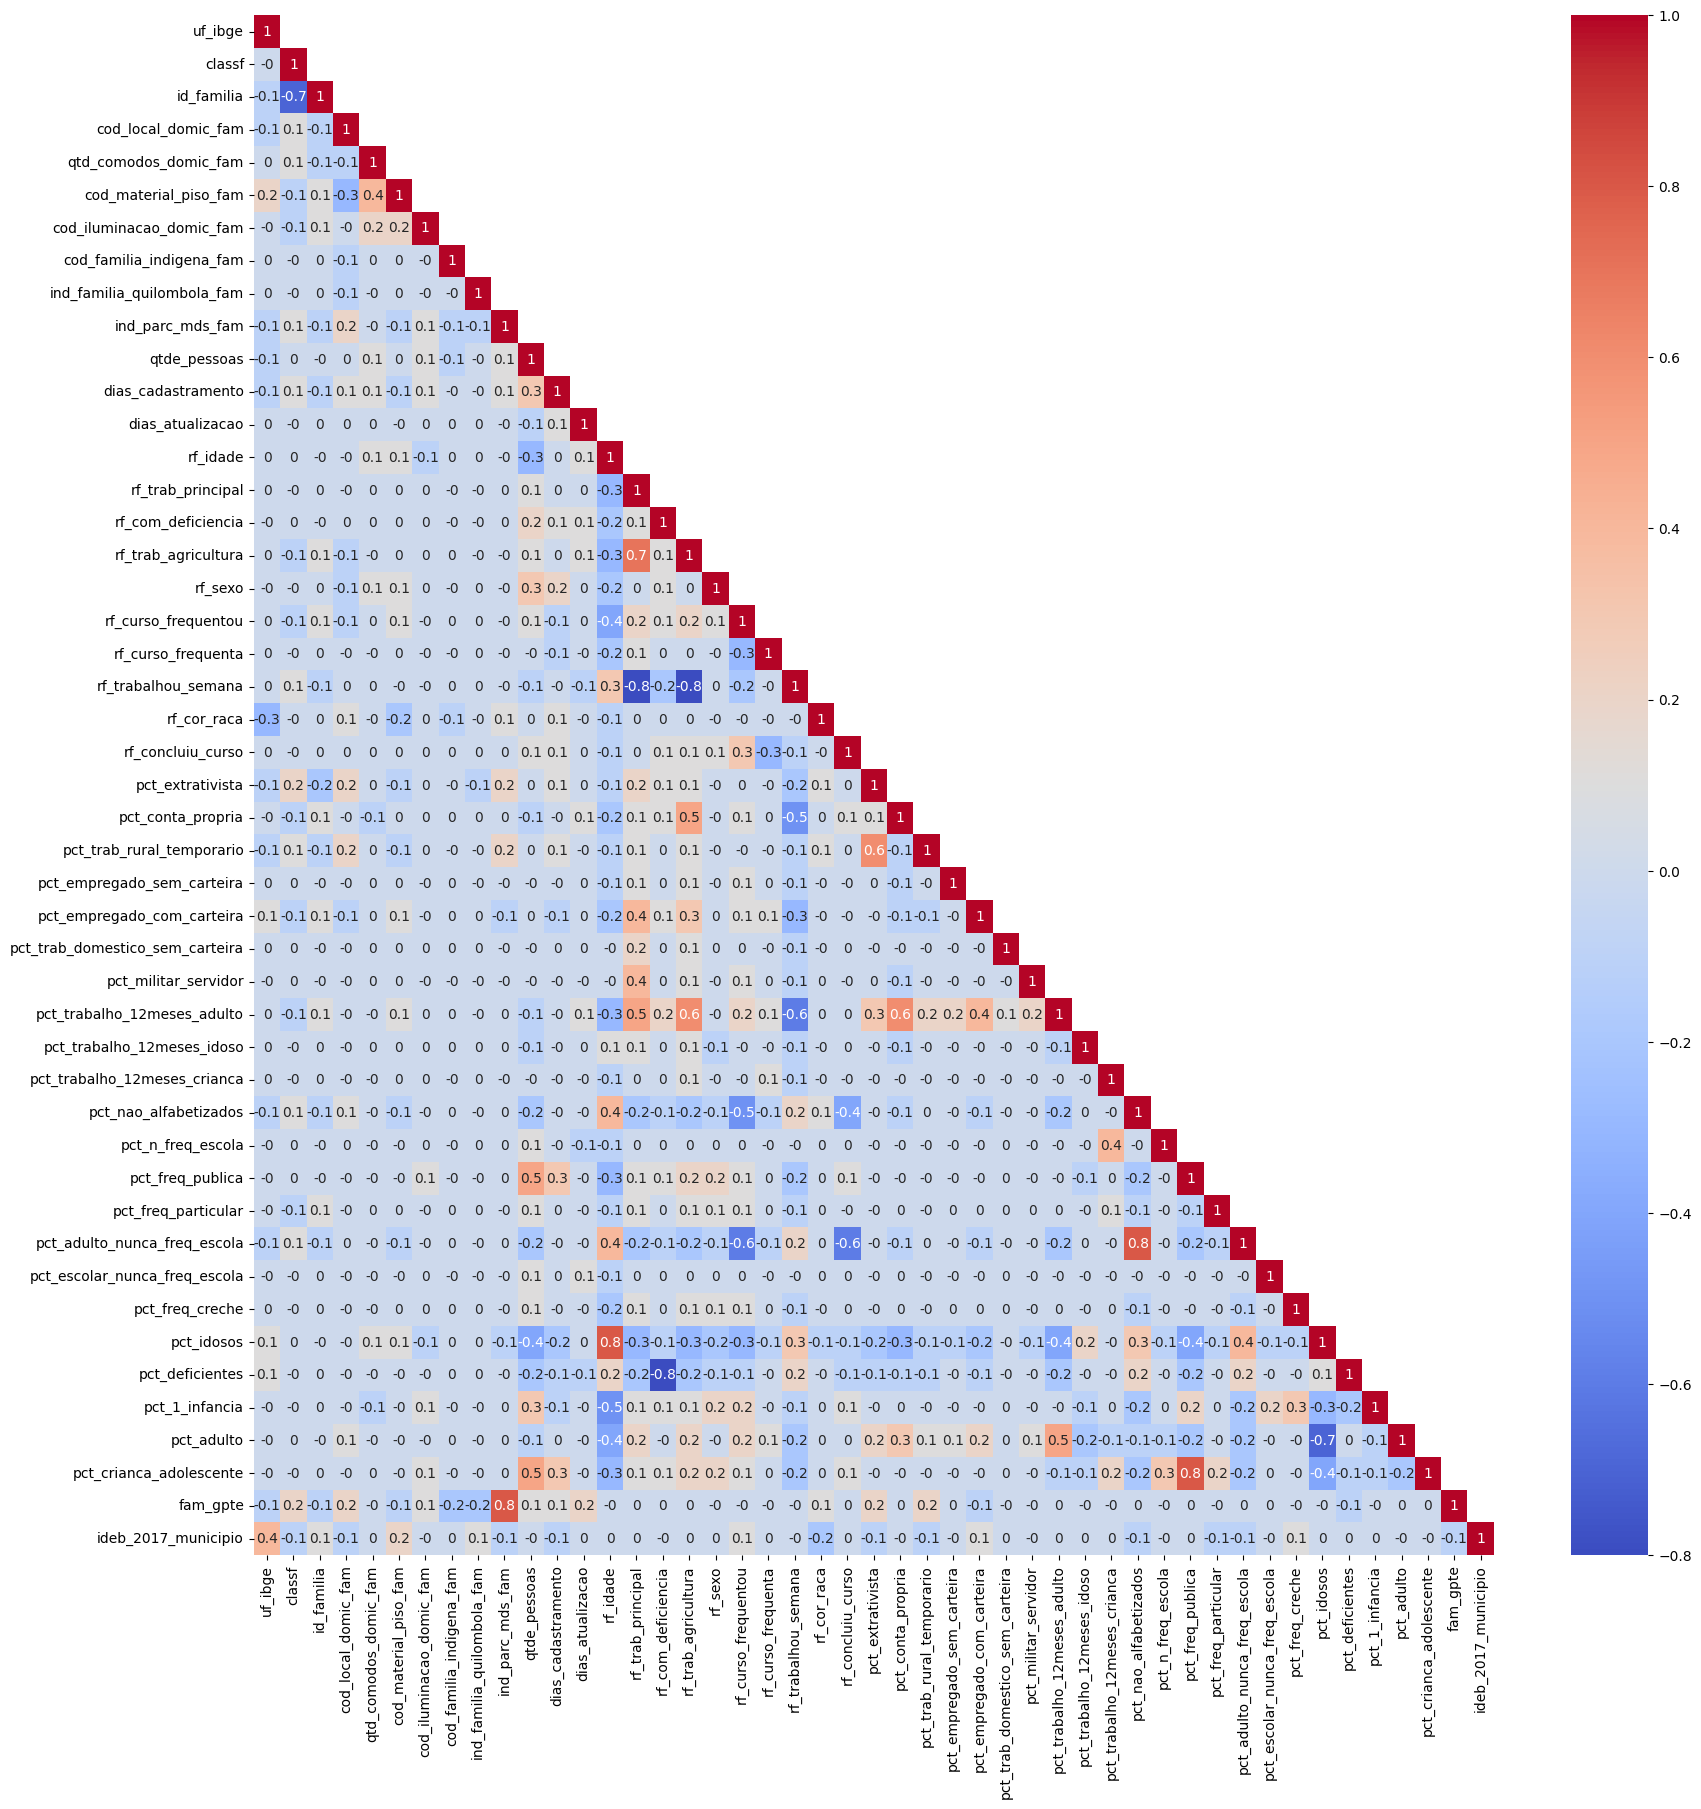

In [8]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia',
       'pct_adulto', 'pct_crianca_adolescente', 'fam_gpte',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [9]:
import numpy as np
import pandas as pd

# Selecionar apenas as colunas numéricas
numeric_cols = df_features.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação
corr_matrix = df_features[numeric_cols].corr()

# Encontrar as correlações com valor absoluto maior que 0.8
corr_strong = corr_matrix[abs(corr_matrix) > 0.8]

# Imprimir as correlações fortes
for col in corr_strong.columns:
    for row in corr_strong.index:
        # Evita a auto-correlacão (corr = 1)
        if col != row and corr_strong.loc[row, col] > 0.8:
            print(f"Correlação forte entre {row} e {col}: {corr_strong.loc[row, col]}")


Correlação forte entre pct_adulto_nunca_freq_escola e pct_nao_alfabetizados: 0.8128946407705234
Correlação forte entre pct_nao_alfabetizados e pct_adulto_nunca_freq_escola: 0.8128946407705234


In [10]:
#Retirando features com correlação > 8
df_balanceado = df_balanceado.drop(columns=['pct_adulto_nunca_freq_escola'])
                                               
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,fam_gpte,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2.0,2.0,205.0,...,0.0,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [11]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_

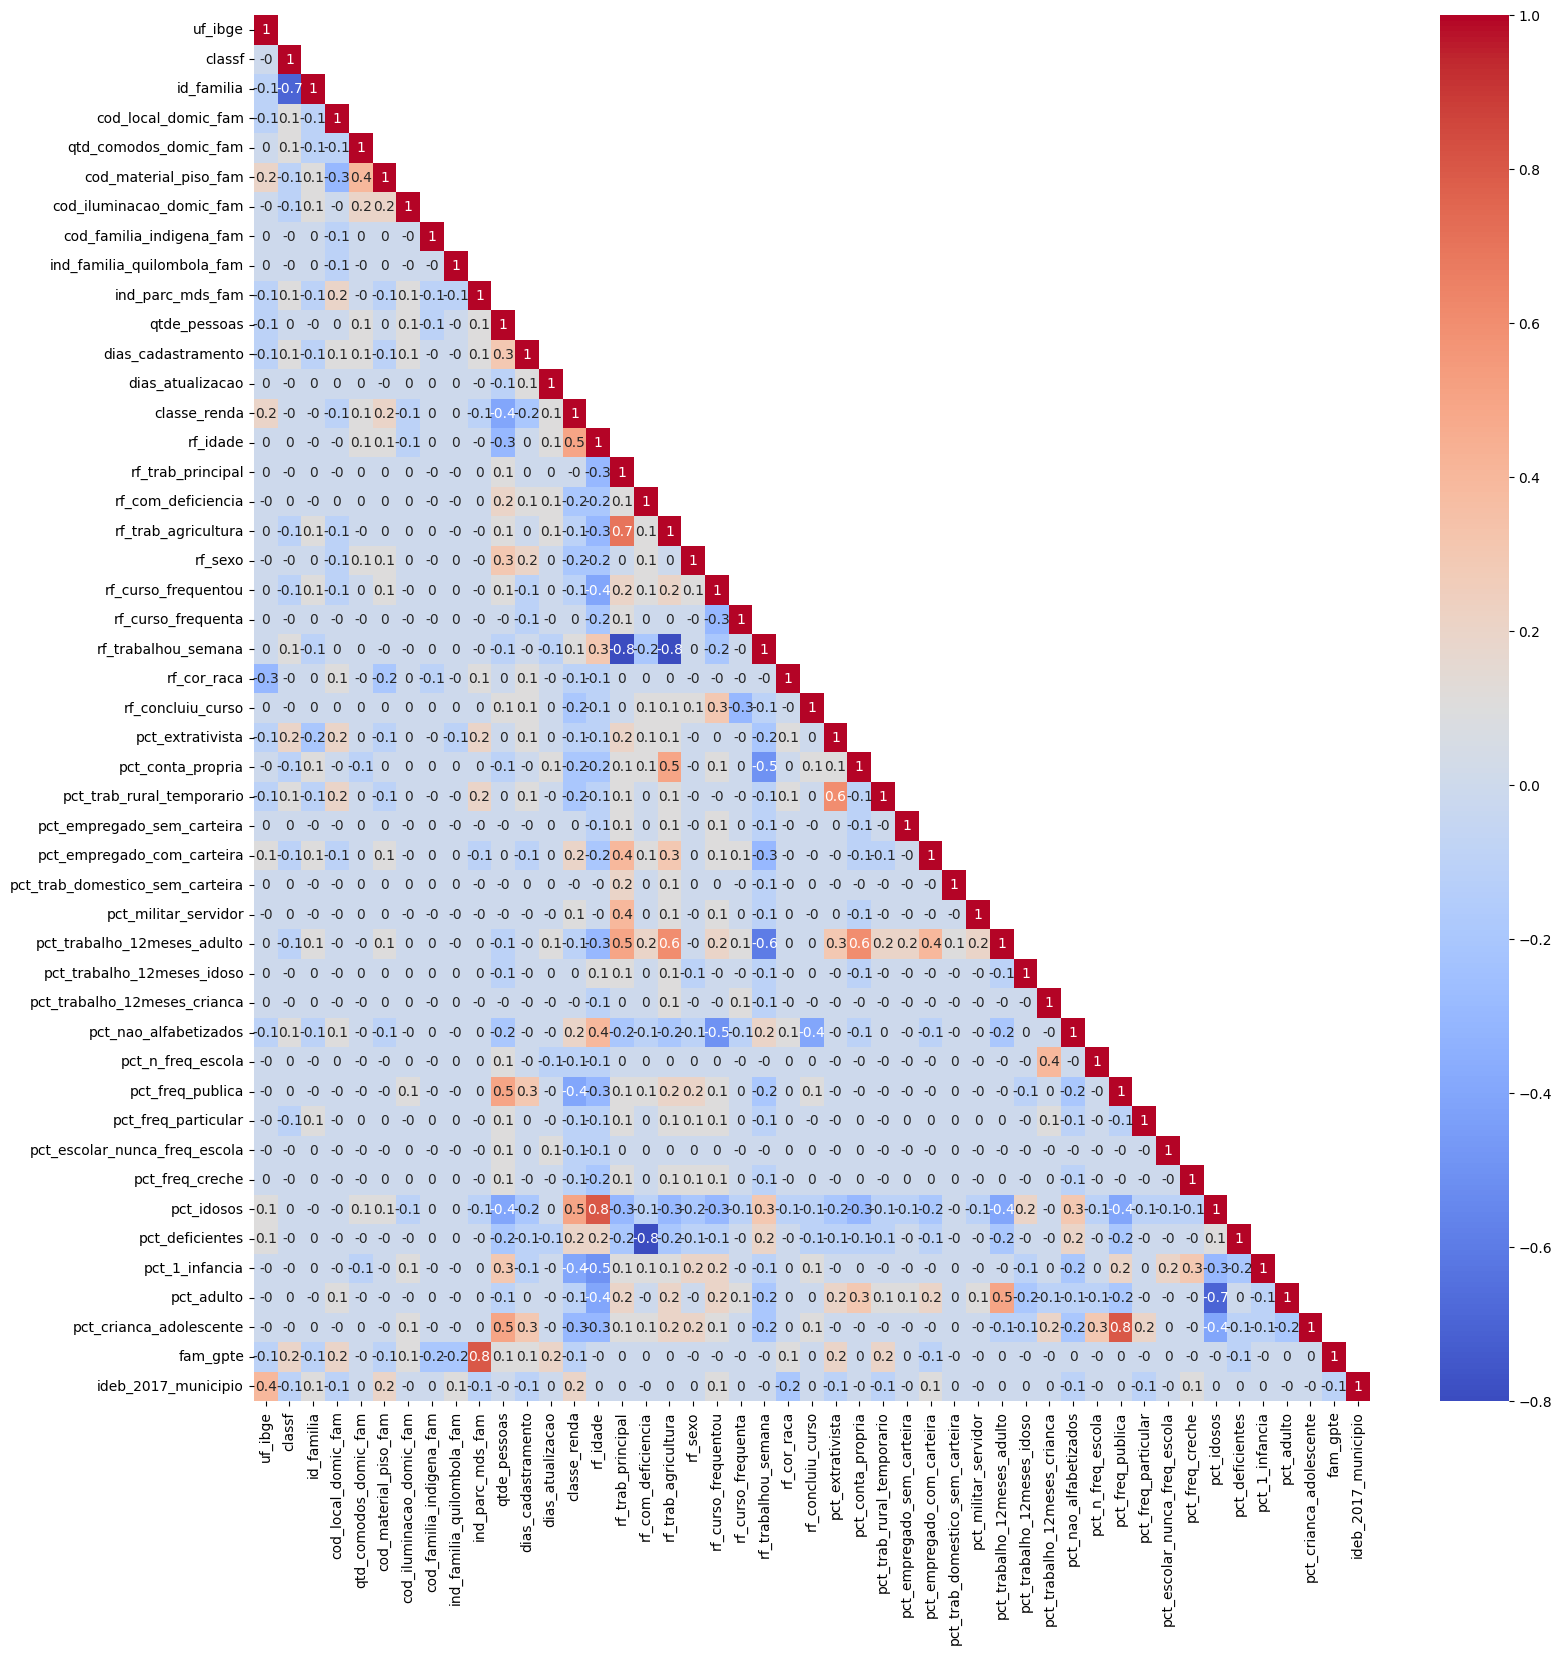

In [12]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'fam_gpte', 'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(18,18))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [13]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.8
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: rf_com_deficiencia e pct_deficientes, Correlação: 0.84
Colunas: rf_trab_agricultura e rf_trabalhou_semana, Correlação: 0.81


In [14]:
#Retirando features com correlação > 8
df_balanceado = df_balanceado.drop(columns=['pct_deficientes', 'rf_trab_agricultura'])
                                               
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,...,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,pct_crianca_adolescente,fam_gpte,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,2.0,2.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,2.0,2.0,0.0,...,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2.0,2.0,205.0,...,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2.0,2.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,2.0,2.0,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.333333,0.666667,0.000000,0.0,4.6


In [15]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',


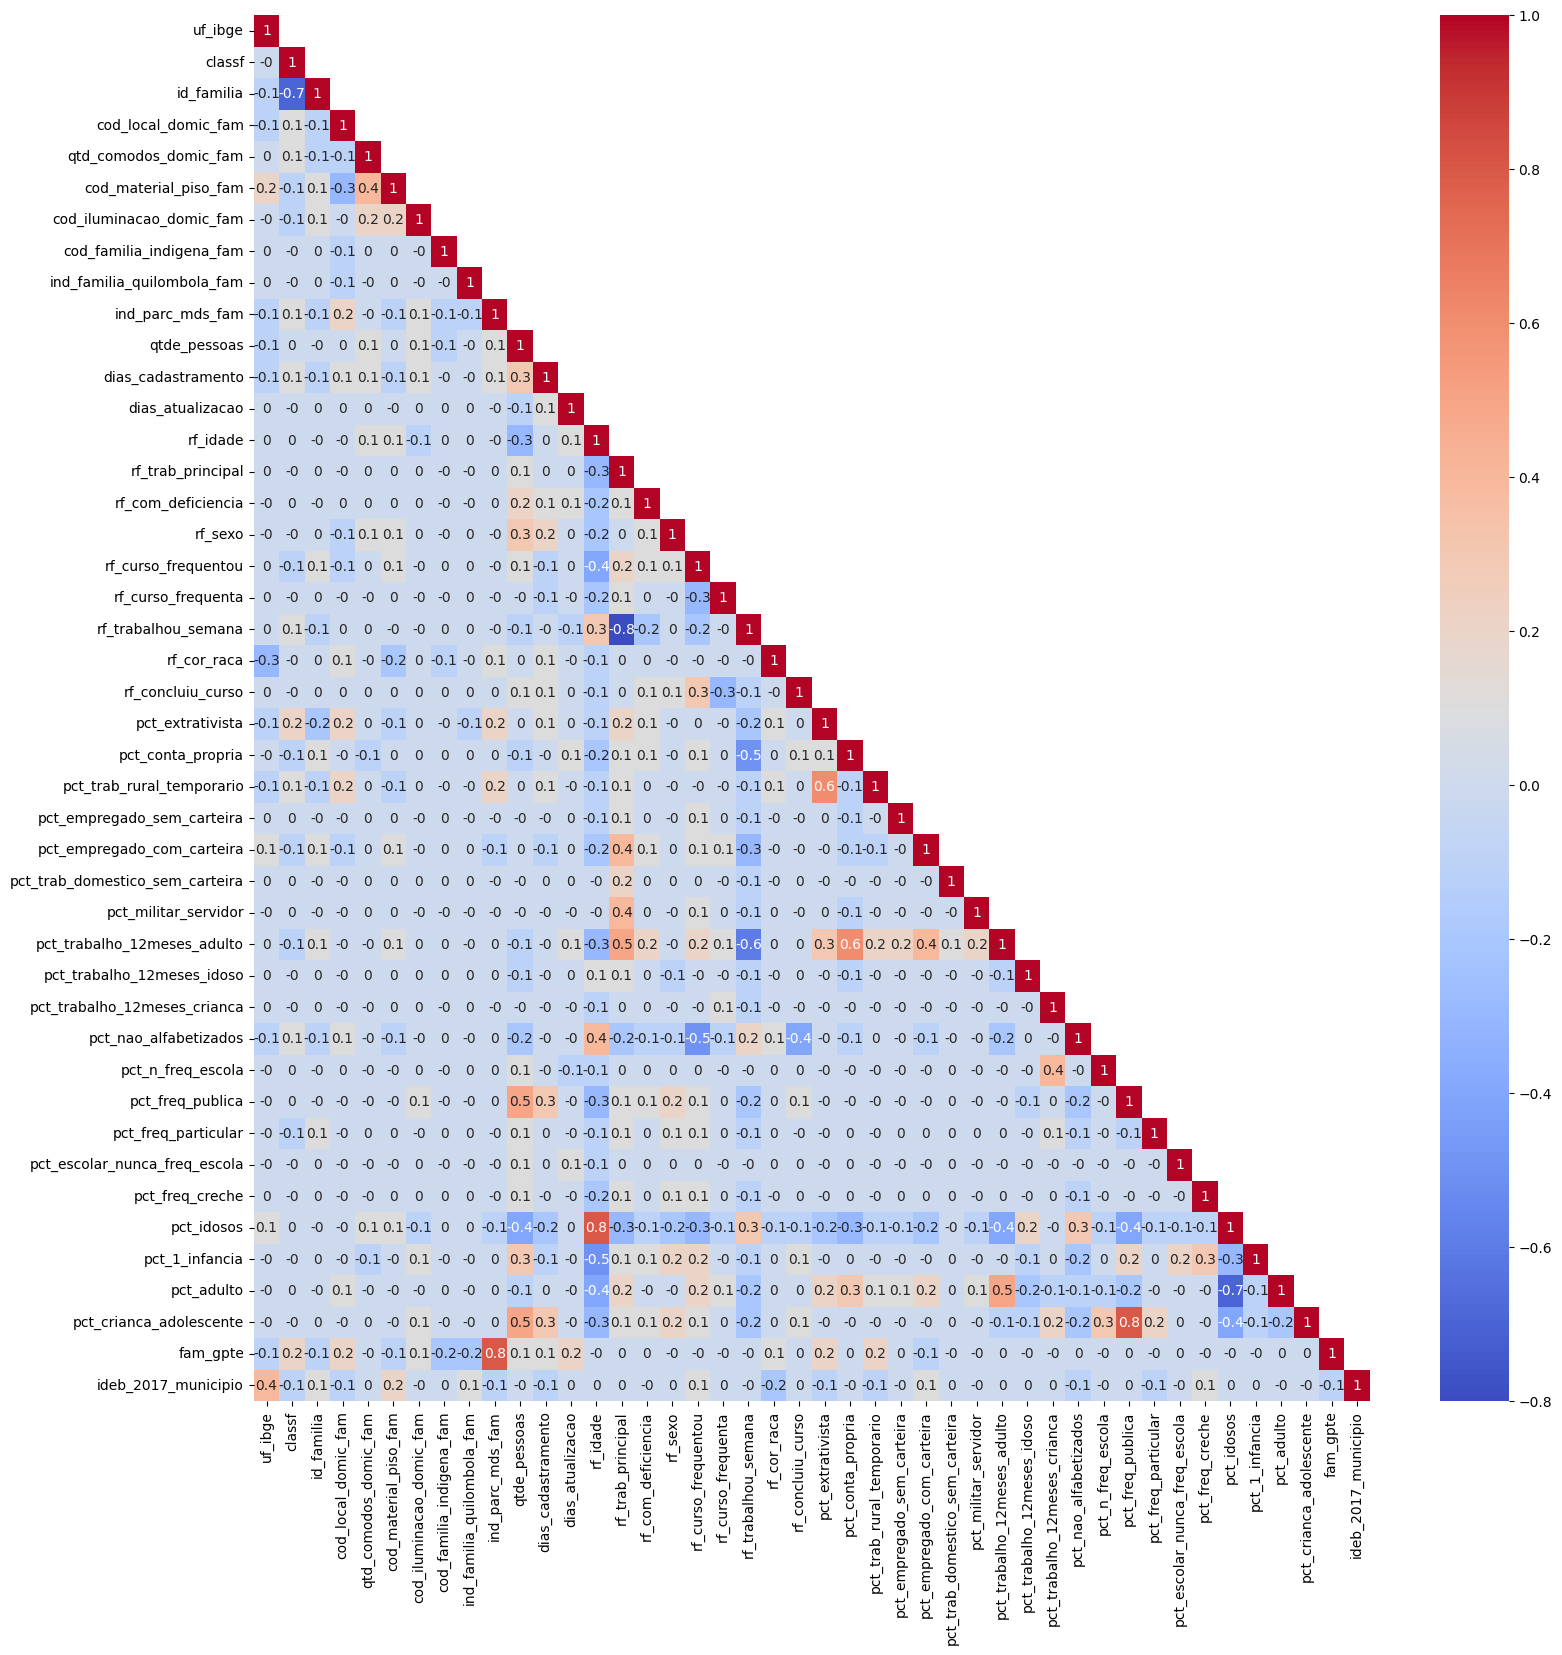

In [16]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente', 'fam_gpte',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(18,18))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [17]:
# Obter a matriz de correlação
corr_matrix = df_features.corr().abs()
threshold = 0.75

# Obter os índices de correlações altas, exceto a diagonal principal
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

# Imprimir os pares de correlação alta
if high_corr_list:  # Verifica se há pares na lista
    for col1, col2, corr_value in high_corr_list:
        print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")
else:
    print("Não tem correlações altas acima do limite estabelecido.")


Colunas: ind_parc_mds_fam e fam_gpte, Correlação: 0.78
Colunas: rf_idade e pct_idosos, Correlação: 0.76
Colunas: rf_trab_principal e rf_trabalhou_semana, Correlação: 0.79
Colunas: pct_freq_publica e pct_crianca_adolescente, Correlação: 0.80


In [18]:
#Retirando features com correlação > 7.5
df_balanceado = df_balanceado.drop(columns=['ind_parc_mds_fam', 'rf_trab_principal', 'pct_crianca_adolescente', 'rf_idade'])
                                               
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,...,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_gpte,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,2.0,2.0,3,...,0.000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,2.0,2.0,8,...,0.125,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2.0,2.0,2,...,0.000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2.0,2.0,2,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,2.0,2.0,3,...,0.000,0.333333,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,4.6


In [19]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_com_deficiencia', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_1_infancia', 'pct_adulto', 'fam_gpte', 'ideb_201

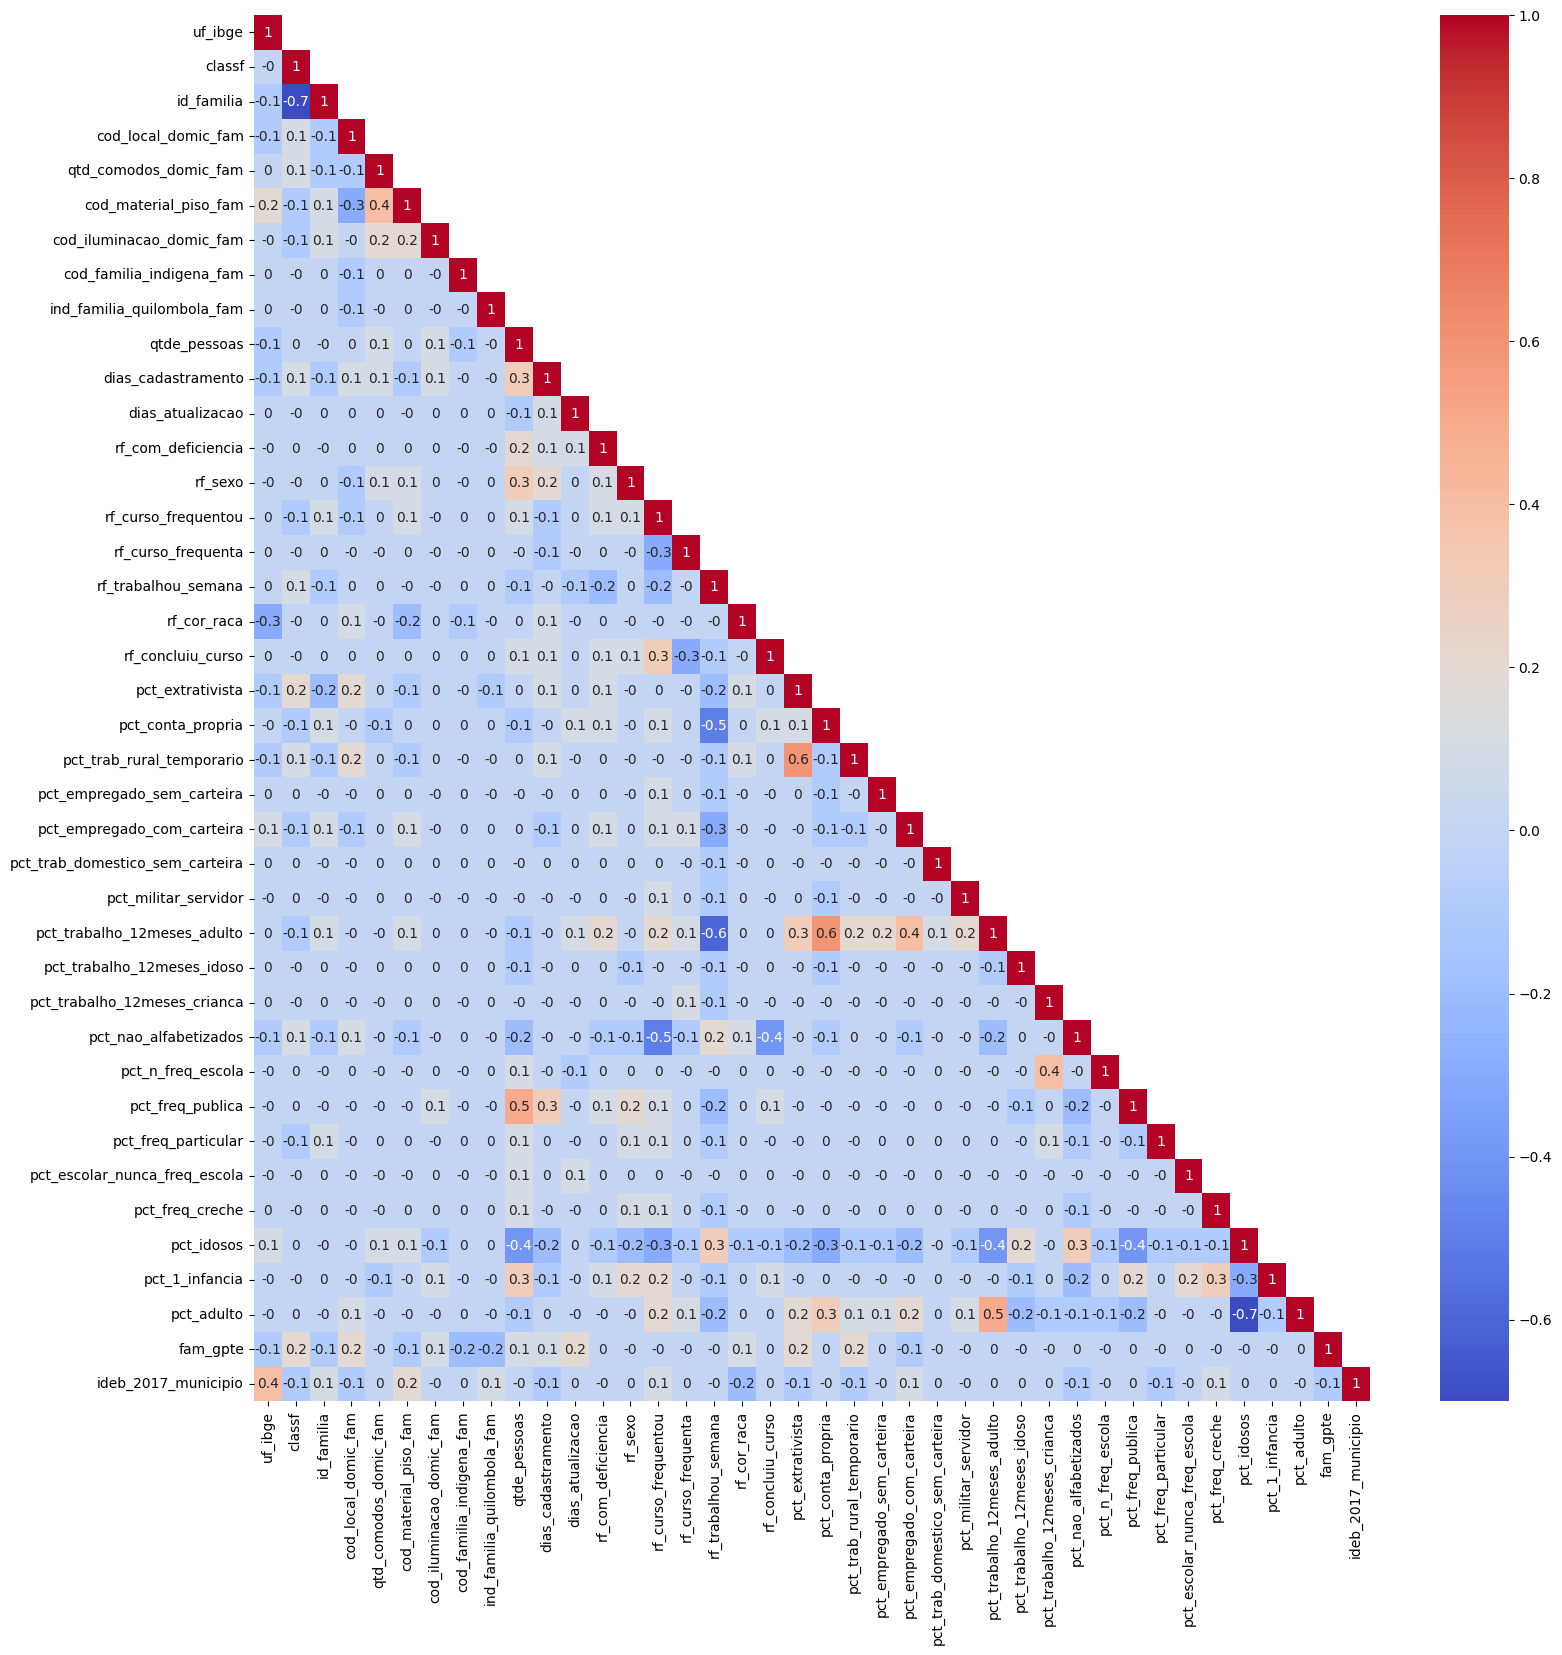

In [20]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'rf_com_deficiencia', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_1_infancia', 'pct_adulto', 'fam_gpte', 'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(18,18))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [21]:
# Obter a matriz de correlação
corr_matrix = df_features.corr().abs()
threshold = 0.75

# Obter os índices de correlações altas, exceto a diagonal principal
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

# Imprimir os pares de correlação alta
if high_corr_list:  # Verifica se há pares na lista
    for col1, col2, corr_value in high_corr_list:
        print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")
else:
    print("Não tem correlações altas acima do limite estabelecido.")

Não tem correlações altas acima do limite estabelecido.


In [22]:
df_balanceado.shape

(96791, 41)

# Fazendo uma amostra de 10mil

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Definindo a amostra
sample_size = 10000

# Fazendo a amostragem estratificada
df_sample, _ = train_test_split(df_balanceado, 
                                 train_size=sample_size, 
                                 stratify=df_balanceado['classe_renda'], 
                                 random_state=42)

# Mostrando a amostra resultante
print(df_sample['classe_renda'].value_counts())


classe_renda
2    3387
0    3315
1    3298
Name: count, dtype: int64


In [24]:
df_sample.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,...,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_gpte,ideb_2017_municipio
79712,52,1,4353387,1.0,5.0,2.0,1.0,2.0,2.0,1,...,0.0,0.000000,0.0,0.00,0.0,1.0,0.00,0.000000,0.0,5.9
36045,27,1,4569986,1.0,5.0,2.0,1.0,2.0,2.0,3,...,0.0,0.333333,0.0,0.00,0.0,0.0,0.00,0.666667,0.0,5.0
93095,35,2,2618787,1.0,5.0,5.0,1.0,2.0,2.0,2,...,0.0,0.000000,0.0,0.00,0.0,1.0,0.00,0.000000,0.0,6.2
78641,51,1,4301802,1.0,5.0,5.0,2.0,2.0,2.0,2,...,0.0,0.000000,0.0,0.00,0.0,0.0,0.50,0.500000,0.0,5.6
23557,35,1,5163090,1.0,3.0,5.0,1.0,2.0,2.0,4,...,0.0,0.500000,0.0,0.25,0.0,0.0,0.25,0.250000,0.0,6.3


In [25]:
df_sample.shape

(10000, 41)

In [26]:
df_sample.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_com_deficiencia', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_1_infancia', 'pct_adulto', 'fam_gpte', 'ideb_201

## Criando uma função de processamento OrdinalEncoder

In [27]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

def preprocess_data(df, id_col='id_familia', target_col='classe_renda'):
    # Definir colunas categóricas e numéricas
    binary_cols = ['cod_familia_indigena_fam', 'ind_familia_quilombola_fam', 'rf_com_deficiencia', 'rf_sexo', 'rf_trabalhou_semana', 'fam_gpte']  
    multiclass_cols = ['uf_ibge', 'classf', 'cod_local_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam', 
                       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_cor_raca', 'rf_concluiu_curso'] 
    numerical_cols = ['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio'] 
    percentage_cols = ['pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
                       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
                       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
                       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
                       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
                       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
                       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
                       'pct_1_infancia', 'pct_adulto']  

    # Verificar se as colunas percentuais estão no formato correto
    for col in percentage_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Certificar-se de que a coluna de identificação está em formato de string
    df[id_col] = df[id_col].astype(str)

    # Inicializar o OrdinalEncoder
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    # Aplicar Ordinal Encoding nas colunas binárias e multiclass
    encoded_binary = encoder.fit_transform(df[binary_cols])
    encoded_multiclass = encoder.fit_transform(df[multiclass_cols])

    # Criar DataFrames com os dados codificados
    encoded_binary_df = pd.DataFrame(encoded_binary, columns=binary_cols)
    encoded_multiclass_df = pd.DataFrame(encoded_multiclass, columns=multiclass_cols)

    # Concatenar as variáveis numéricas, percentuais e a coluna de identificação com as variáveis categóricas codificadas
    final_df = pd.concat([df[[id_col]].reset_index(drop=True),  # Manter a coluna de ID
                           df[numerical_cols].reset_index(drop=True), 
                           df[percentage_cols].reset_index(drop=True), 
                           encoded_binary_df.reset_index(drop=True), 
                           encoded_multiclass_df.reset_index(drop=True),
                           df[[target_col]].reset_index(drop=True)], 
                          axis=1)

    return final_df






In [28]:
#chamando a função
df_sample = preprocess_data(df_sample)
df_sample.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,...,uf_ibge,classf,cod_local_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,rf_curso_frequentou,rf_curso_frequenta,rf_cor_raca,rf_concluiu_curso,classe_renda
0,4353387,5.0,1,452.0,452,5.9,0.0,0.00,0.0,0.0,...,25.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2
1,4569986,5.0,3,1111.0,237,5.0,0.0,0.00,0.0,0.0,...,13.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,2.0,1
2,2618787,5.0,2,1802.0,346,6.2,0.0,0.00,0.0,0.0,...,19.0,1.0,0.0,5.0,1.0,3.0,0.0,3.0,2.0,2
3,4301802,5.0,2,28.0,28,5.6,0.5,0.00,0.0,0.0,...,24.0,0.0,0.0,5.0,2.0,7.0,0.0,3.0,1.0,2
4,5163090,3.0,4,1972.0,599,6.3,0.0,0.25,0.0,0.0,...,19.0,0.0,0.0,5.0,1.0,7.0,0.0,3.0,2.0,0


In [29]:
df_sample.columns

Index(['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_1_infancia', 'pct_adulto', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'rf_com_deficiencia', 'rf_sexo',
       'rf_trabalhou_semana', 'fam_gpte', 'uf_ibge', 'classf',
       'cod_local_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_cor_raca', 'rf_concluiu_curso', 'c

## Criando uma função de normalização das colunas quantitativas

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def normalize_numerical_columns(df, numerical_cols):
    # Inicializar o MinMaxScaler para normalização entre 0 e 1
    scaler = MinMaxScaler()

    # Criar um Pipeline para normalizar as colunas numéricas
    pipeline = Pipeline(steps=[
        ('scaler', scaler)
    ])
    
    # Aplicar o Pipeline apenas nas colunas numéricas
    df[numerical_cols] = pipeline.fit_transform(df[numerical_cols])

    return df

# Uso n
numerical_cols = ['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio'] 


In [31]:
# Chamando a função
df_sample = normalize_numerical_columns(df_sample, numerical_cols)
df_sample.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,...,uf_ibge,classf,cod_local_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,rf_curso_frequentou,rf_curso_frequenta,rf_cor_raca,rf_concluiu_curso,classe_renda
0,4353387,0.315789,0.0,0.066493,0.292339,0.683168,0.0,0.00,0.0,0.0,...,25.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2
1,4569986,0.315789,0.2,0.167227,0.147849,0.594059,0.0,0.00,0.0,0.0,...,13.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,2.0,1
2,2618787,0.315789,0.1,0.272852,0.221102,0.712871,0.0,0.00,0.0,0.0,...,19.0,1.0,0.0,5.0,1.0,3.0,0.0,3.0,2.0,2
3,4301802,0.315789,0.1,0.001681,0.007392,0.653465,0.5,0.00,0.0,0.0,...,24.0,0.0,0.0,5.0,2.0,7.0,0.0,3.0,1.0,2
4,5163090,0.210526,0.3,0.298838,0.391129,0.722772,0.0,0.25,0.0,0.0,...,19.0,0.0,0.0,5.0,1.0,7.0,0.0,3.0,2.0,0


In [32]:
# Ajustar a configuração do Pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)


In [33]:
# Exibir todas as colunas do DataFrame final
print(df_sample.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'cod_familia_indigena_fam', 'ind_familia_quilombola_fam', 'rf_com_deficiencia', 'rf_sexo', 'rf_trabalhou_semana', 'fam_gpte', 'uf_ibge', 'classf', 'cod_local_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam', 'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_cor_raca', 'rf_concluiu_curso', 'classe_renda']


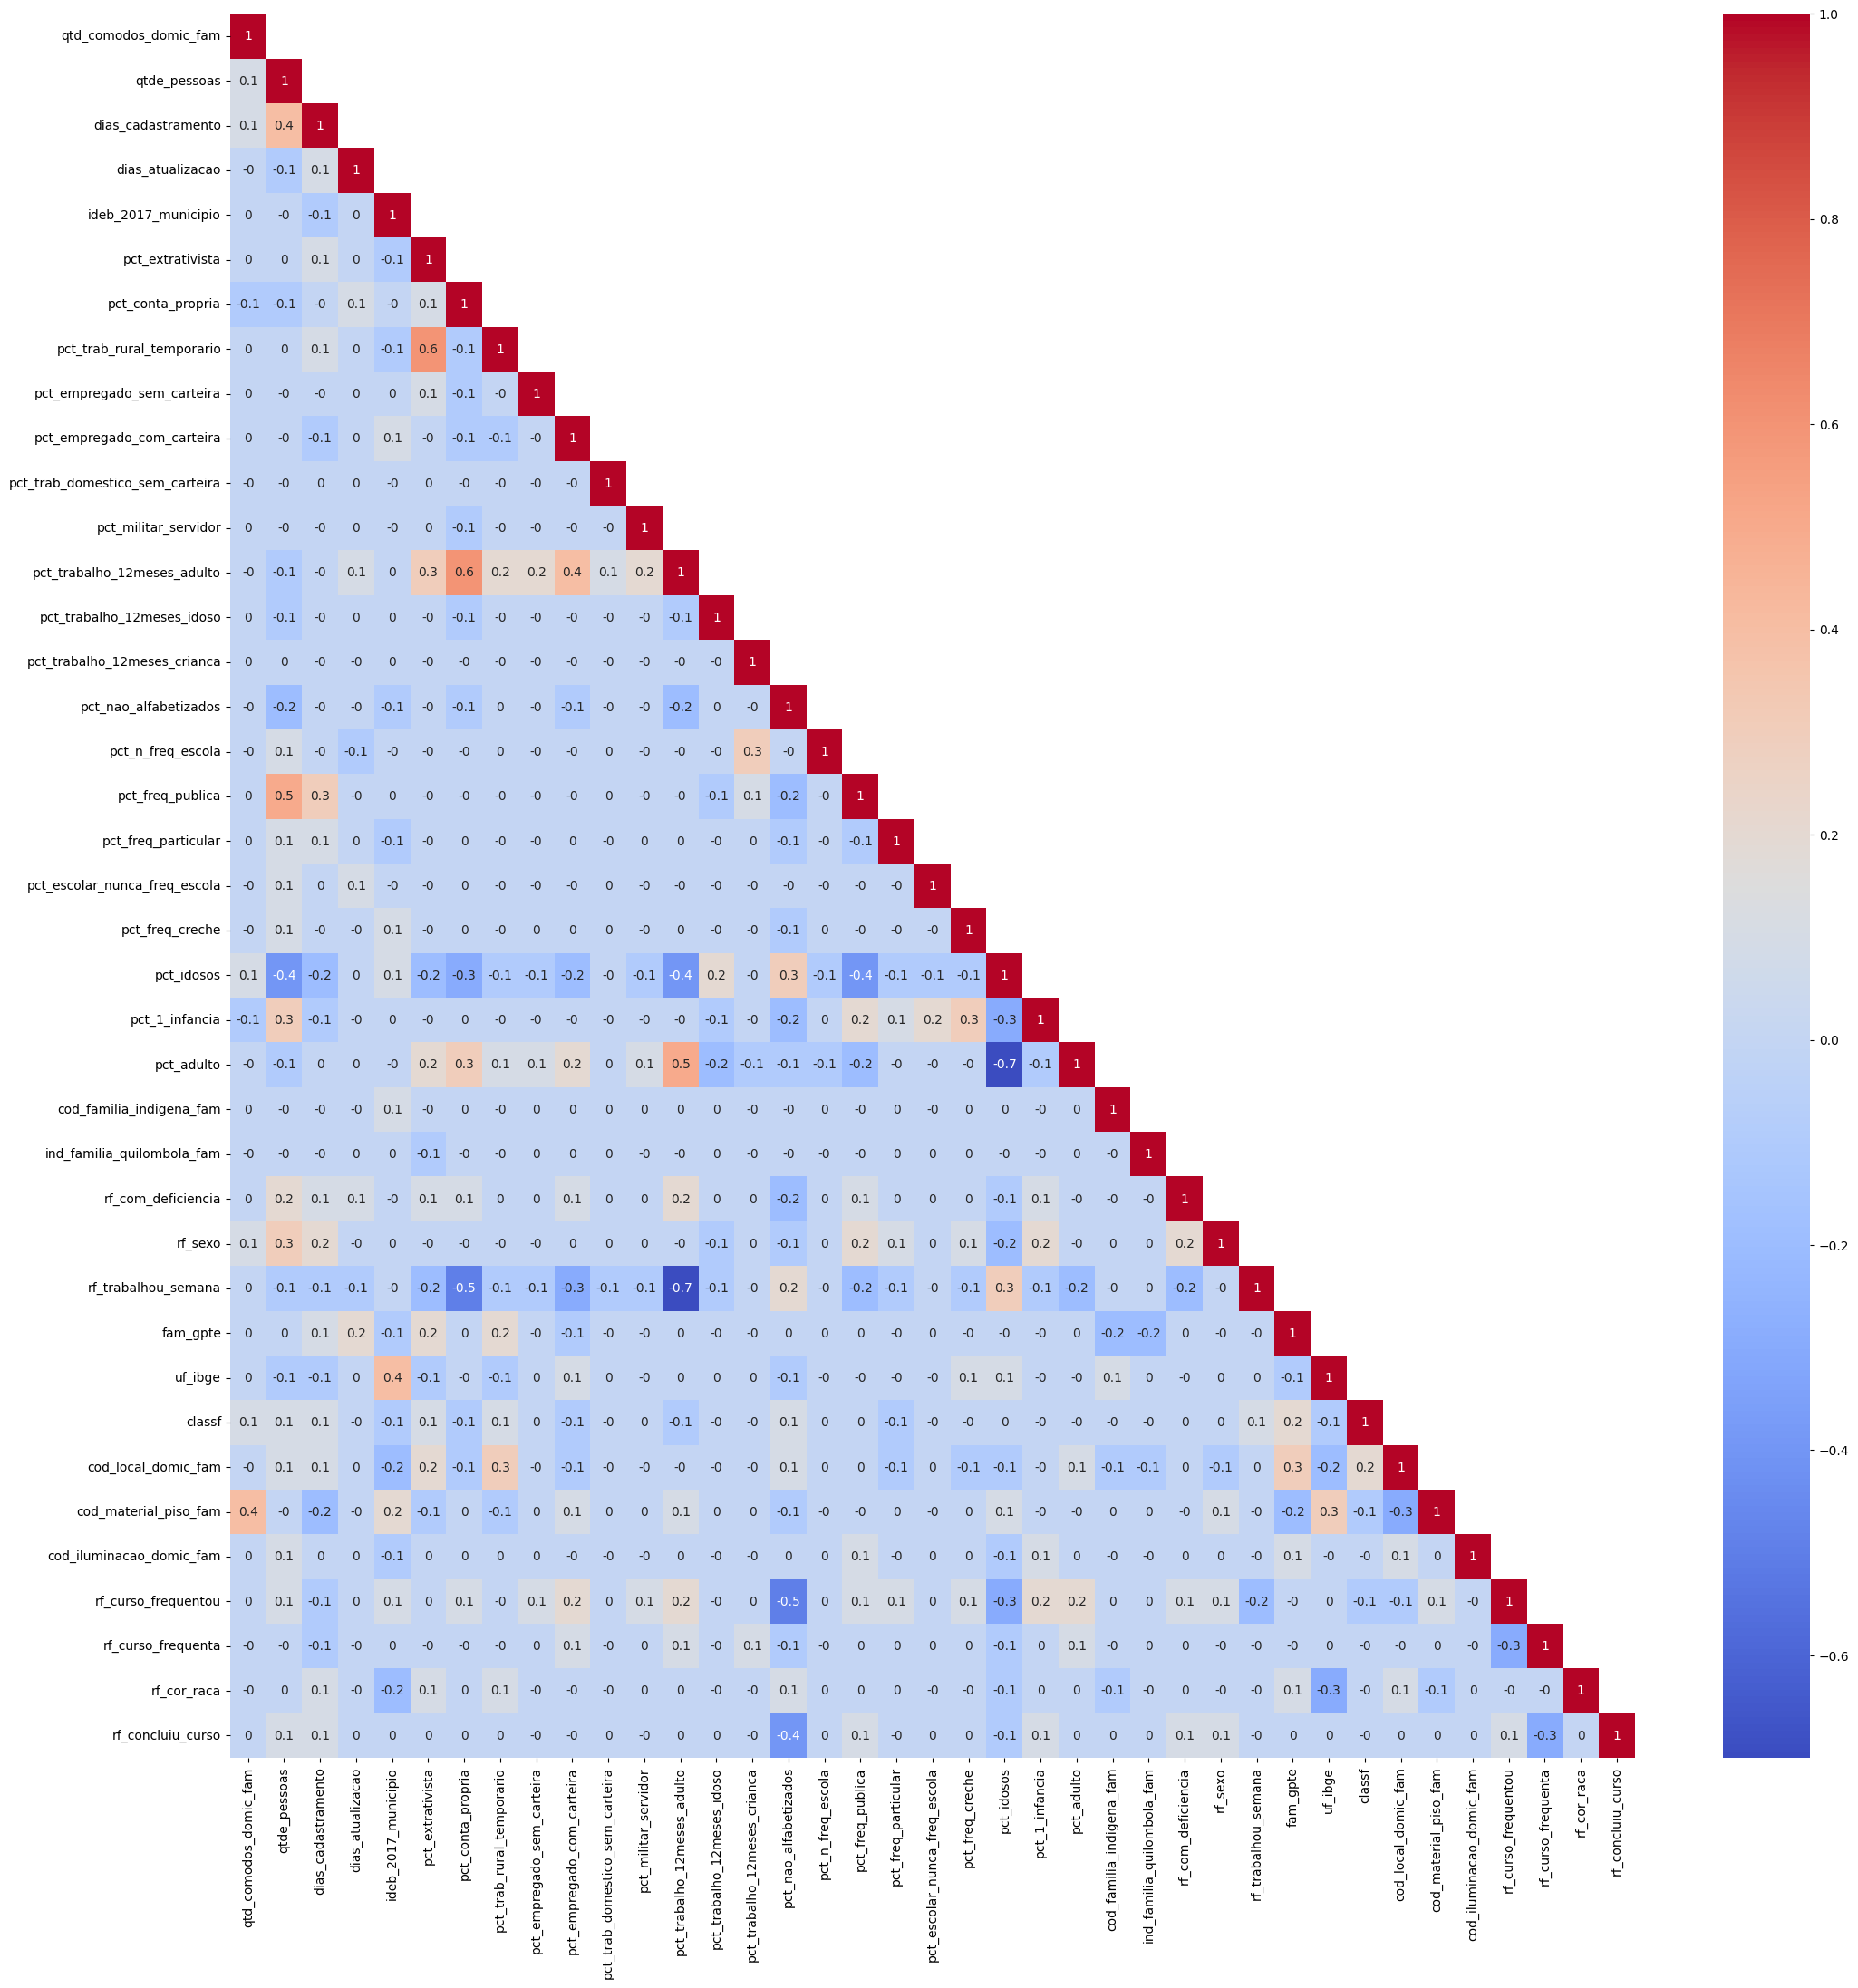

In [38]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_sample[['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
                         'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
                         'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche',
                         'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'cod_familia_indigena_fam', 'ind_familia_quilombola_fam', 'rf_com_deficiencia', 'rf_sexo', 'rf_trabalhou_semana', 'fam_gpte',
                         'uf_ibge', 'classf', 'cod_local_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam', 'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_cor_raca', 'rf_concluiu_curso']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(25,25))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

## Seleção das variáveis independentes (Features)

In [40]:
# Exibir todas as colunas do DataFrame final
print(df_sample.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'cod_familia_indigena_fam', 'ind_familia_quilombola_fam', 'rf_com_deficiencia', 'rf_sexo', 'rf_trabalhou_semana', 'fam_gpte', 'uf_ibge', 'classf', 'cod_local_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam', 'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_cor_raca', 'rf_concluiu_curso', 'classe_renda']


In [41]:
# Selecionando as variáveis que serão utilizadas para o modelo
X_sample = df_sample[['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
                      'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
                      'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 
                      'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'cod_familia_indigena_fam', 'ind_familia_quilombola_fam', 'rf_com_deficiencia', 'rf_sexo', 'rf_trabalhou_semana', 'fam_gpte',
                      'uf_ibge', 'classf', 'cod_local_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam', 'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_cor_raca', 'rf_concluiu_curso']]
y_sample = df_sample['classe_renda']

# Exibindo as informações de X
print('X_sample =', X_sample.shape)
X_sample.head()

X_sample = (10000, 39)


,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,cod_familia_indigena_fam,ind_familia_quilombola_fam,rf_com_deficiencia,rf_sexo,rf_trabalhou_semana,fam_gpte,uf_ibge,classf,cod_local_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,rf_curso_frequentou,rf_curso_frequenta,rf_cor_raca,rf_concluiu_curso
0,0.315789,0.0,0.066493,0.292339,0.683168,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,1.0,0.00,0.000000,1.0,1.0,0.0,1.0,1.0,0.0,25.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
1,0.315789,0.2,0.167227,0.147849,0.594059,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.333333,0.0,0.00,0.0,0.0,0.00,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,2.0
2,0.315789,0.1,0.272852,0.221102,0.712871,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.50,0.0,0.000000,0.0,0.00,0.0,1.0,0.00,0.000000,1.0,1.0,1.0,0.0,1.0,0.0,19.0,1.0,0.0,5.0,1.0,3.0,0.0,3.0,2.0
3,0.315789,0.1,0.001681,0.007392,0.653465,0.5,0.00,0.0,0.0,0.5,0.0,0.0,0.50,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.50,0.500000,1.0,1.0,1.0,1.0,0.0,0.0,24.0,0.0,0.0,5.0,2.0,7.0,0.0,3.0,1.0
4,0.210526,0.3,0.298838,0.391129,0.722772,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.25,0.0,0.500000,0.0,0.25,0.0,0.0,0.25,0.250000,1.0,1.0,1.0,1.0,0.0,0.0,19.0,0.0,0.0,5.0,1.0,7.0,0.0,3.0,2.0


In [42]:
# Verificar se há algum valor nulo no dataframe X
nulos = X_sample.isnull().sum()

# Exibir apenas as colunas que têm valores nulos
nulos_com_valores = nulos[nulos > 0]

print("Colunas com valores nulos e suas quantidades:")
print(nulos_com_valores)


Colunas com valores nulos e suas quantidades:
Series([], dtype: int64)


In [43]:
y_sample.head()

0    2
1    1
2    2
3    2
4    0
Name: classe_renda, dtype: int64

In [44]:
X_sample.describe()

,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,cod_familia_indigena_fam,ind_familia_quilombola_fam,rf_com_deficiencia,rf_sexo,rf_trabalhou_semana,fam_gpte,uf_ibge,classf,cod_local_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,rf_curso_frequentou,rf_curso_frequenta,rf_cor_raca,rf_concluiu_curso
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.279895,0.145110,0.336676,0.278163,0.645498,0.044033,0.117527,0.020605,0.009394,0.060311,0.003423,0.011033,0.243383,0.014285,0.003920,0.134140,0.013985,0.157271,0.013645,0.006253,0.010680,0.227686,0.103451,0.515952,0.996000,0.995000,0.91550,0.80000,0.664600,0.103600,14.76680,1.387700,0.168600,3.570000,1.208400,4.461600,0.215100,1.901200,1.215600
std,0.093198,0.136125,0.304433,0.226470,0.096109,0.158564,0.244612,0.109644,0.075773,0.174082,0.044921,0.083285,0.307507,0.109520,0.046005,0.292561,0.076956,0.230618,0.075955,0.047538,0.062181,0.391652,0.186033,0.352370,0.063122,0.070537,0.27815,0.40002,0.472154,0.304756,5.93265,0.792245,0.383391,1.656676,0.858629,2.757333,1.324993,1.385002,0.738086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.263158,0.000000,0.064621,0.100638,0.574257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,1.000000,1.00000,1.00000,0.000000,0.000000,10.00000,1.000000,0.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000
50%,0.315789,0.100000,0.232421,0.227823,0.653465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,1.00000,1.00000,1.000000,0.000000,16.00000,2.000000,0.000000,5.000000,1.000000,4.000000,0.000000,3.000000,1.000000
75%,0.315789,0.200000,0.575512,0.381720,0.722772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.200000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,0.000000,19.00000,2.000000,0.000000,5.000000,1.000000,7.000000,0.000000,3.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,0.800000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,26.00000,2.000000,2.000000,7.000000,6.000000,14.000000,10.000000,4.000000,2.000000


In [45]:
y_sample.describe()

count    10000.000000
mean         1.007200
std          0.818667
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: classe_renda, dtype: float64

In [46]:
y_sample.value_counts()

classe_renda
2    3387
0    3315
1    3298
Name: count, dtype: int64

In [47]:
y_sample.isnull().sum()

0

In [48]:
# Dividir os dados em treino e teste
X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

In [49]:
y_sample_train.describe()

count    8000.000000
mean        1.007250
std         0.818707
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: classe_renda, dtype: float64

## Estimação padrão

In [50]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Separando dados em folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dicionário de modelos com hiperparâmetros para otimização
models = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'XGBoost': (XGBClassifier(eval_metric='logloss'), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    'CatBoost': (CatBoostClassifier(silent=True), {
        'iterations': [100, 200],
        'depth': [4, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    })
}

# Avaliando e treinando cada modelo
for model_name, (model, param_grid) in models.items():
    print(f"Avaliando modelo: {model_name}")
    
    # Ajuste de hiperparâmetros com GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_sample_train, y_sample_train)
    
    # Melhor estimador encontrado e seus parâmetros
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Melhores parâmetros para {model_name}: {best_params}")
    
    # Avaliando o modelo com validação cruzada usando os melhores parâmetros
    scores = cross_val_score(best_model, X_sample_train, y_sample_train, cv=skf, scoring='accuracy')
    print("Scores de validação cruzada:", scores)
    print("Acurácia média:", scores.mean())
    
    # Treinando o modelo com os melhores parâmetros e fazendo previsões
    best_model.fit(X_sample_train, y_sample_train)  # Treinando o modelo
    y_pred = best_model.predict(X_sample_test)  # Fazendo previsões
    
    # Avaliar o modelo
    print("Relatório de classificação:")
    print(classification_report(y_sample_test, y_pred))
    print("Acurácia:", accuracy_score(y_sample_test, y_pred))
    print("-" * 50)  # Separador entre os modelos


Avaliando modelo: Random Forest
Melhores parâmetros para Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Scores de validação cruzada: [0.724375 0.7075   0.709375 0.7075   0.715   ]
Acurácia média: 0.71275
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       663
           1       0.66      0.60      0.63       660
           2       0.77      0.79      0.78       677

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000

Acurácia: 0.722
--------------------------------------------------
Avaliando modelo: XGBoost
Melhores parâmetros para XGBoost: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 50}
Scores de validação cruzada: [0.72     0.715    0.71125  0.716875 0.72    ]
Acurácia média: 0.716625
Relatório de classificação:
              precision    recall  f1-sc

## Avaliando as features mais importantes

In [54]:
!pip install lime -q

In [63]:
import pandas as pd
import numpy as np
from lime import lime_tabular
from sklearn.model_selection import GridSearchCV
import warnings

# Ignorar avisos
warnings.filterwarnings("ignore")

# Inicializar um DataFrame global para armazenar todas as importâncias
feature_importance_df = pd.DataFrame(columns=['Modelo', 'Feature', 'Importância'])

# Função para calcular e armazenar a importância para um modelo usando LIME
def calcular_importancia_lime(model, X_sample_train, model_name):
    global feature_importance_df
    
    # Criar um objeto LIME explainer
    explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_sample_train),  # Dados de treinamento
        mode='classification',  # Modo de classificação
        feature_names=X_sample_train.columns,  # Nomes das features
        class_names=['<=50K', '>50K'],  # Nomes das classes, ajuste conforme necessário
        discretize_continuous=True  # Para discretizar variáveis contínuas
    )
    
    # Escolha algumas instâncias para explicar (exemplo: as 10 primeiras)
    instances_to_explain = X_sample_train.sample(n=10, random_state=42)

    # Lista para armazenar as importâncias
    feature_importance_temp = []
    
    for index, instance in instances_to_explain.iterrows():
        try:
            exp = explainer.explain_instance(
                data_row=instance.values,  # Instância a ser explicada como array
                predict_fn=model.predict_proba  # Função de predição do modelo
            )
            # Armazenar as importâncias das features
            for feature, importance in exp.as_list():
                feature_importance_df.loc[len(feature_importance_df)] = [model_name, feature, importance]
        
        except Exception as e:
            print(f"Erro ao explicar a instância {index}: {e}")
            continue  # Continuar para a próxima instância em caso de erro
    
    return feature_importance_temp

# Lista para armazenar as importâncias de todos os modelos
all_importances = []

# Calcular as importâncias usando os melhores modelos ajustados
for model_name, (model, param_grid) in models.items():
    print(f"Calculando a importância das features para o modelo: {model_name}")
    
    # Ajuste dos hiperparâmetros com GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_sample_train, y_sample_train)
    best_model = grid_search.best_estimator_
    print(f"Melhores parâmetros para {model_name}: {grid_search.best_params_}")
    
    # Calcular a importância das features usando LIME
    feature_importancia_temp = calcular_importancia_lime(best_model, X_sample_train, model_name)
    all_importances.append((model_name, feature_importancia_temp))

# Exibir as importâncias coletadas de forma simplificada
simplified_importance = {}

# Resumir as importâncias
for model_name in feature_importance_df['Modelo'].unique():
    filtered_df = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    importance_values = filtered_df['Importância'].values
    median_importance = np.median(importance_values)

    # Filtrar as features que estão acima da mediana
    filtered_features = filtered_df[filtered_df['Importância'] > median_importance]['Feature'].unique()

    # Adicionar ao dicionário
    simplified_importance[model_name] = list(filtered_features)

# Mostrar as importâncias simplificadas
for model_name, features in simplified_importance.items():
    print(f"Features importantes acima da mediana para {model_name}:")
    for feature in features:
        print(f"- {feature}")

# Exibir o DataFrame de importâncias
print("\nDataFrame de Importâncias:")
print(feature_importance_df.head())


Calculando a importância das features para o modelo: Random Forest
Melhores parâmetros para Random Forest: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200}
Calculando a importância das features para o modelo: XGBoost
Melhores parâmetros para XGBoost: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 50}
Calculando a importância das features para o modelo: CatBoost
Melhores parâmetros para CatBoost: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}
Features importantes acima da mediana para Random Forest:
- 0.00 < pct_idosos <= 0.33
- 0.10 < qtde_pessoas <= 0.20
- pct_conta_propria <= 0.00
- pct_trab_rural_temporario <= 0.00
- rf_curso_frequenta <= 0.00
- qtde_pessoas > 0.20
- pct_idosos <= 0.00
- 2.00 < cod_material_piso_fam <= 5.00
- uf_ibge > 19.00
- 0.00 < qtde_pessoas <= 0.10
- pct_1_infancia <= 0.00
- ideb_2017_municipio > 0.72
- 0.65 < ideb_2017_municipio <= 0.72
- pct_empregado_sem_carteira > 0.00
- 0.00 < pct_freq_publica <= 0.33
- 0.50 < pct_adulto <= 1

In [64]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Filtrar as features que têm importância maior que a mediana para os três modelos
selected_models = ['Random Forest', 'XGBoost', 'CatBoost']  # Use os nomes corretos dos seus modelos

for model_name in selected_models:
    if model_name in feature_importance_df['Modelo'].unique():
        # Filtrar os dados para o modelo específico
        model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
        
        # Calcular a mediana das importâncias para o modelo
        median_importance = model_group['Importância'].median()
        
        # Filtrar as features com importância maior que a mediana
        important_features = model_group[model_group['Importância'] > median_importance]
        
        # Adicionar ao dicionário
        important_features_per_model[model_name] = important_features[['Feature', 'Importância']]

# Agregar as features importantes de todos os modelos
aggregated_features = pd.DataFrame()

for model_name, important_features in important_features_per_model.items():
    aggregated_features = pd.concat([aggregated_features, important_features.assign(Model=model_name)])

# Remover duplicatas, se necessário
aggregated_features = aggregated_features.drop_duplicates(subset=['Feature'])

# Exibir as features agregadas
print("\nFeatures importantes agregadas acima da mediana para os modelos selecionados:\n")
print(aggregated_features.to_string(index=False))


Features importantes agregadas acima da mediana para os modelos selecionados:

                                Feature  Importância         Model
              0.00 < pct_idosos <= 0.33     0.104698 Random Forest
            0.10 < qtde_pessoas <= 0.20     0.050230 Random Forest
              pct_conta_propria <= 0.00     0.032809 Random Forest
      pct_trab_rural_temporario <= 0.00     0.025967 Random Forest
             rf_curso_frequenta <= 0.00     0.023964 Random Forest
                    qtde_pessoas > 0.20     0.079436 Random Forest
                     pct_idosos <= 0.00     0.049448 Random Forest
   2.00 < cod_material_piso_fam <= 5.00     0.025024 Random Forest
                        uf_ibge > 19.00     0.023518 Random Forest
            0.00 < qtde_pessoas <= 0.10     0.045217 Random Forest
                 pct_1_infancia <= 0.00     0.029410 Random Forest
             ideb_2017_municipio > 0.72     0.027504 Random Forest
     0.65 < ideb_2017_municipio <= 0.72     0.024

# Base total df_balanced

## Chamando a função de processamento OrdinalEncoder

In [67]:
# Chamando a função criada para transformar as variáveis categóricas
df_balanceado = preprocess_data(df_balanceado)

In [68]:
df_balanceado.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,cod_familia_indigena_fam,ind_familia_quilombola_fam,rf_com_deficiencia,rf_sexo,rf_trabalhou_semana,fam_gpte,uf_ibge,classf,cod_local_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,rf_curso_frequentou,rf_curso_frequenta,rf_cor_raca,rf_concluiu_curso,classe_renda
0,4736936,2.0,3,3290.0,510,4.8,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,0
1,2562870,4.0,8,1774.0,101,4.6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125000,0.125,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0,1.0,12.0,0.0,3.0,0.0,0
2,1843654,4.0,2,1966.0,598,4.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,1.0,1.0,0.0,0.0,1.0,15.0,2.0,1.0,2.0,1.0,8.0,0.0,1.0,2.0,0
3,1946851,5.0,2,812.0,285,4.2,0.5,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,1.0,1.0,1.0,1.0,0.0,0.0,14.0,2.0,1.0,2.0,1.0,4.0,0.0,3.0,2.0,0
4,4194650,5.0,3,5772.0,591,4.6,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.000,0.333333,0.0,0.0,0.0,0.0,0.333333,0.666667,1.0,1.0,1.0,1.0,0.0,0.0,18.0,2.0,0.0,5.0,1.0,5.0,0.0,0.0,2.0,0


## Chamando a função para normalização das colunas quantitativas

In [69]:
# Chamando a função de normalização das colunas quantitativas
df_balanceado = normalize_numerical_columns(df_balanceado, numerical_cols)

In [70]:
df_balanceado.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,cod_familia_indigena_fam,ind_familia_quilombola_fam,rf_com_deficiencia,rf_sexo,rf_trabalhou_semana,fam_gpte,uf_ibge,classf,cod_local_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,rf_curso_frequentou,rf_curso_frequenta,rf_cor_raca,rf_concluiu_curso,classe_renda
0,4736936,0.142857,0.166667,0.500306,0.331317,0.574257,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,0
1,2562870,0.238095,0.583333,0.268572,0.056452,0.554455,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125000,0.125,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0,1.0,12.0,0.0,3.0,0.0,0
2,1843654,0.238095,0.083333,0.297921,0.390457,0.495050,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,1.0,1.0,0.0,0.0,1.0,15.0,2.0,1.0,2.0,1.0,8.0,0.0,1.0,2.0,0
3,1946851,0.285714,0.083333,0.121522,0.180108,0.514851,0.5,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,1.0,1.0,1.0,1.0,0.0,0.0,14.0,2.0,1.0,2.0,1.0,4.0,0.0,3.0,2.0,0
4,4194650,0.285714,0.166667,0.879700,0.385753,0.554455,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.000,0.333333,0.0,0.0,0.0,0.0,0.333333,0.666667,1.0,1.0,1.0,1.0,0.0,0.0,18.0,2.0,0.0,5.0,1.0,5.0,0.0,0.0,2.0,0


In [71]:
# Verificar a presença de valores NaN
print(df_balanceado.isnull().sum().sum())

0


In [72]:
# Exibir todas as colunas do DataFrame final
print(df_balanceado.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'cod_familia_indigena_fam', 'ind_familia_quilombola_fam', 'rf_com_deficiencia', 'rf_sexo', 'rf_trabalhou_semana', 'fam_gpte', 'uf_ibge', 'classf', 'cod_local_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam', 'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_cor_raca', 'rf_concluiu_curso', 'classe_renda']


## Retirando as features que não são > que a mediana

In [73]:
df_balanceado_1 = df_balanceado.drop(columns=['qtd_comodos_domic_fam', 'dias_cadastramento', 'pct_extrativista',                                         
 'pct_militar_servidor',                               'pct_trabalho_12meses_idoso', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 
                                                'cod_familia_indigena_fam',
                                              'ind_familia_quilombola_fam', 'rf_com_deficiencia', 'rf_sexo', 'rf_trabalhou_semana',   'classf',
                                            'cod_iluminacao_domic_fam', 'rf_curso_frequentou',  'rf_cor_raca', 'rf_concluiu_curso'])

In [74]:
df_balanceado_1.head()

,id_familia,qtde_pessoas,dias_atualizacao,ideb_2017_municipio,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_trabalho_12meses_adulto,pct_trabalho_12meses_crianca,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_gpte,uf_ibge,cod_local_domic_fam,cod_material_piso_fam,rf_curso_frequenta,classe_renda
0,4736936,0.166667,0.331317,0.574257,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,4.0,0.0,2.0,0.0,0
1,2562870,0.583333,0.056452,0.554455,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,0.0,2.0,0.0,2.0,0.0,0
2,1843654,0.083333,0.390457,0.495050,0.500000,0.0,0.0,0.0,0.0,0.500000,0.0,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,15.0,1.0,2.0,0.0,0
3,1946851,0.083333,0.180108,0.514851,0.500000,0.0,0.0,0.0,0.0,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,14.0,1.0,2.0,0.0,0
4,4194650,0.166667,0.385753,0.554455,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,18.0,0.0,5.0,0.0,0


In [75]:
df_balanceado_1.head().columns

Index(['id_familia', 'qtde_pessoas', 'dias_atualizacao', 'ideb_2017_municipio',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_trabalho_12meses_adulto',
       'pct_trabalho_12meses_crianca', 'pct_freq_publica',
       'pct_freq_particular', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto',
       'fam_gpte', 'uf_ibge', 'cod_local_domic_fam', 'cod_material_piso_fam',
       'rf_curso_frequenta', 'classe_renda'],
      dtype='object')

## Criando o dataframe X e a variável target y

In [76]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_balanceado_1[['qtde_pessoas', 'dias_atualizacao', 'ideb_2017_municipio',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_trabalho_12meses_adulto',
       'pct_trabalho_12meses_crianca', 'pct_freq_publica',
       'pct_freq_particular', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto',
       'fam_gpte', 'uf_ibge', 'cod_local_domic_fam', 'cod_material_piso_fam',
       'rf_curso_frequenta']]
y = df_balanceado_1['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96791, 22)


,qtde_pessoas,dias_atualizacao,ideb_2017_municipio,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_trabalho_12meses_adulto,pct_trabalho_12meses_crianca,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_gpte,uf_ibge,cod_local_domic_fam,cod_material_piso_fam,rf_curso_frequenta
0,0.166667,0.331317,0.574257,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,4.0,0.0,2.0,0.0
1,0.583333,0.056452,0.554455,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,0.0,2.0,0.0,2.0,0.0
2,0.083333,0.390457,0.495050,0.500000,0.0,0.0,0.0,0.0,0.500000,0.0,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,15.0,1.0,2.0,0.0
3,0.083333,0.180108,0.514851,0.500000,0.0,0.0,0.0,0.0,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,14.0,1.0,2.0,0.0
4,0.166667,0.385753,0.554455,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,18.0,0.0,5.0,0.0


In [77]:
# Verificar a presença de valores NaN
print(X.isnull().sum())

qtde_pessoas                       0
dias_atualizacao                   0
ideb_2017_municipio                0
pct_conta_propria                  0
pct_trab_rural_temporario          0
pct_empregado_sem_carteira         0
pct_empregado_com_carteira         0
pct_trab_domestico_sem_carteira    0
pct_trabalho_12meses_adulto        0
pct_trabalho_12meses_crianca       0
pct_freq_publica                   0
pct_freq_particular                0
pct_escolar_nunca_freq_escola      0
pct_freq_creche                    0
pct_idosos                         0
pct_1_infancia                     0
pct_adulto                         0
fam_gpte                           0
uf_ibge                            0
cod_local_domic_fam                0
cod_material_piso_fam              0
rf_curso_frequenta                 0
dtype: int64


In [78]:
y.tail()

96786    2
96787    2
96788    2
96789    2
96790    2
Name: classe_renda, dtype: int64

In [79]:
y.value_counts()

classe_renda
2    32786
0    32089
1    31916
Name: count, dtype: int64

In [80]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Treinando os modelos com validação cruzada

In [81]:
# Definir os modelos e os parâmetros
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [200, 300],
            'classifier__max_depth': [10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [300, 350],
            'classifier__max_depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [500, 600],
            'classifier__depth': [2, 3],
            'classifier__learning_rate': [0.1]
    }
  }
}


In [83]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 350}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 3, 'classifier__iterations': 600, 'classifier__learning_rate': 0.1}


## Avaliação do Modelo

In [84]:
from sklearn.metrics import accuracy_score, f1_score

In [85]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")


Modelo: RandomForest
  F1 Score: 0.70
  Acurácia: 0.70
Modelo: XGBoost
  F1 Score: 0.71
  Acurácia: 0.71
Modelo: CatBoost
  F1 Score: 0.71
  Acurácia: 0.71


# 4. Geração de Matriz de Confusão

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

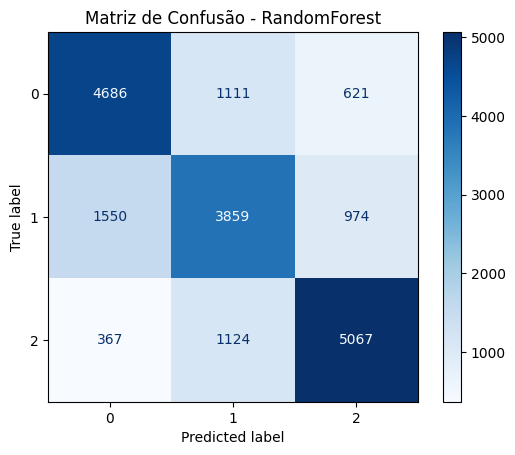

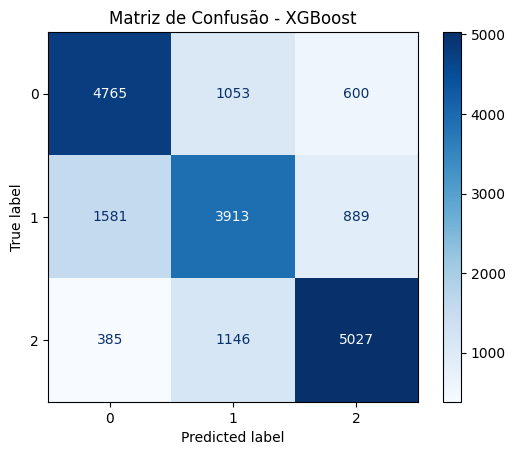

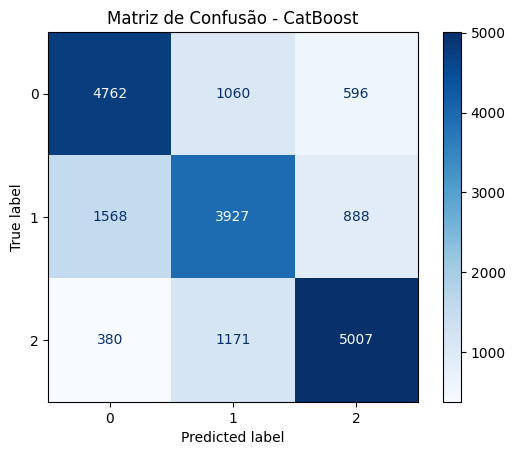

In [87]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()